#### Imports Libraries
***

In [12]:
#-----Standard Import
import numpy as np
import pandas as pd

#-----For Plotting Graphs
import seaborn as sb
import matplotlib.pyplot as plt 
import plotly.express as px

#-----Sklearn modules etc for datas
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc



## Checking Variables and Comparing Models
***
 > By comparing the coefficient and the classification report for each matrix we would like to evaluate each models through the following steps:
 > - Step 1: We would train the model with the data set train_resampled_data with the model chosen, tt
 > - Step 2: Plot out the neccessary graphs to visualise the correlation/the outcome of putting trained against test data
 > - Step 3: Evaluate the relationship between variables
 > - Step 4: Evaluate the respective model's performance
 > - Step 5: Compare the models' performances and relationship between the predictors and response variable
 
 > We have chosen to focus on 4 variables age, bmi, HbA1c , blood_glucose_level as they have the highest correlation while we choose to ignore hypertension and heart disease due to its minute positive data and its close to 0 correelation. We also chose to ignore the smoking history as 36.8% of the data is classified under no information.

#### Defining the performance metrics:
    
   > - Precision: 
        A measure of the model's ability to correctly predict positive cases out of all instances predicted as positive. It is calculated as the proportion of true positives among the predicted positives (true positive + false positive).
    
   > - Recall:
        A measure of the model's ability to correctly predict positive cases out of all actual positive instances. It is calculated as the proportion of true positives among the actual positives (true positives + false negatives).
    
   > - F1-Score:
        A harmonic mean of precision and recall, which gives a balance between the two metrics. It ranges between 0 and 1, with 1 indicating the best possible performance.
        
   > - Support:
         Represents the number of instances or observations in the test set that belong to each class. It shows the number of true positives + false negative instances for each class.
         
   > - Accuracy: 
         A measure of the overall performance of the model in terms of correctly predicting both positive and negative cases. It is calculated as the proportion of correct predictions (true positives+true negatives) out of all predictions.
     
   >- Macro-average:
         A useful metric when the class distribution is relatively balanced as it calculates the average of precision, recall and F1-score for each class separately and then takes the average of those averages, giving each class equal importance, regardless of the number of instances in each class.
     
   >- Weighted-average:
         A useful metric when the class distribution is imbalanced as it calculates teh average of precision, recall and F1-score for each class separately, but the average is weighted by the number of instances in each class, giving more importance to larger classes.
     
 
     
   

### Fine-Tuning

We chose GridSearchCV to fine-tune our machine learning models and incorportated it into all of them in a similar manner. This tool involved selecting a range of hyperparameters to test and coming up with the best combination of hyperparameters which is not immediately apparent to us. By systematically testing different combinations of hyperparameters, GridSearchCV helps identify the optimal set of hyperparameters that maximizes the performance of the specific model and provide the most accurate information regarding the dataset.

#### Read Datas From CSV
***

In [13]:
train_resampled_data = pd.read_csv('train_resampled_data.csv')
test_data = pd.read_csv('test_data.csv')


In [14]:
predictors = ['HbA1c_level', 'blood_glucose_level', 'age', 'bmi']
# Split the data into training and testing sets
X_train = train_resampled_data[predictors]
y_train = train_resampled_data['diabetes']           

X_test = test_data[predictors]
y_test =  test_data['diabetes']  


### Machine Learning Model 1: Logistic Regression
***
Our first machine learning model would be logistic regression which is a commonly used method for analyzing and modeling binary outcomes, which in this case is whether or not a person has diabetes. Although, a logistic regression assumes a linear relationship between the predictor and response variable, since we used GridSearchCV to finetune our model, even though the code does not explicitly include nonlinear terms, the inclusion of the best hyperparameters found by GridSearchCV accounts for some degree of nonlinearity in the data.


Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}



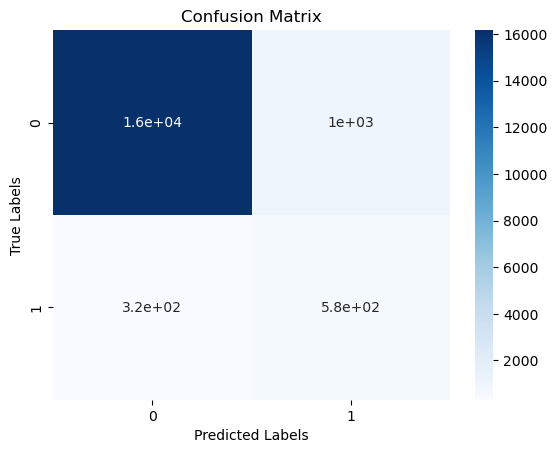

              precision    recall  f1-score   support

    Diabetes       0.37      0.65      0.47       901
 No Diabetes       0.98      0.94      0.96     17177

    accuracy                           0.93     18078
   macro avg       0.67      0.80      0.71     18078
weighted avg       0.95      0.93      0.94     18078

Accuracy: 0.9264299148135856
 
Coefficient scores:
HbA1c_level : 2.218704603925154
blood_glucose_level : 0.026594227382000204
age : 0.052511803993336284
bmi : 0.11620123016899746

Macro-average Precision: 0.6733388688338002
Macro-average Recall: 0.7951230761367719
Macro-average F1-score: 0.7142412645590682

Weighted-average Precision: 0.950174209181044
Weighted-average Recall: 0.9264299148135856
Weighted-average F1-score: 0.9359374047274162

 
Predictor: HbA1c_level
Precision: 0.3834059968899304
Recall: 0.6776434484968036
F1-score: 0.48972752973288636
Support: 5930.699999999996
 
Predictor: blood_glucose_level
Precision: 0.38342589327691584
Recall: 0.69259962049335

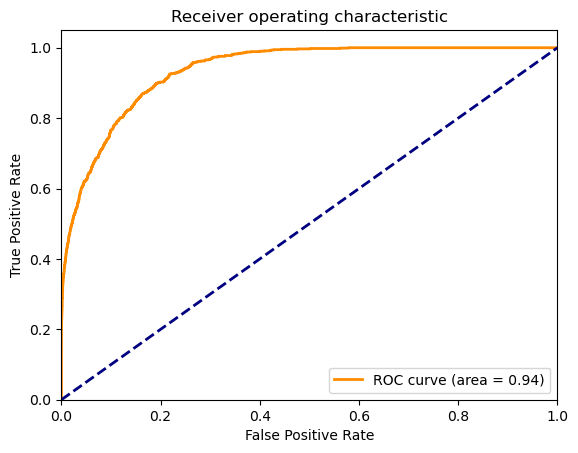

AUC score: 0.9354932327299035


In [15]:

# Create the logistic regression model
model = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best Hyperparameters:', grid_search.best_params_)
print()

# Create the logistic regression model with the best hyperparameters
model = LogisticRegression(**grid_search.best_params_, max_iter=1000)


# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred, labels=[1, 0], target_names=['Diabetes', 'No Diabetes'], zero_division=1)
print(report)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(" ")

print("Coefficient scores:")
# Check for the coeeficient of each variable
coeff = model.coef_
for i in range(len(coeff[0])):
    print(predictors[i],":",coeff[0][i])
print()

# Calculate the macro-average precision, recall, and F1-score
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro-average Precision:", macro_precision)
print("Macro-average Recall:", macro_recall)
print("Macro-average F1-score:", macro_f1)

# Calculate the weighted-average precision, recall, and F1-score
weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print()
print("Weighted-average Precision:", weighted_precision)
print("Weighted-average Recall:", weighted_recall)
print("Weighted-average F1-score:", weighted_f1)
print()

# Calculate and print precision, recall, F1-score, and support for each predictor
for predictor in predictors:
    report = classification_report(y_test, y_pred, labels=[1, 0], target_names=['Diabetes', 'No Diabetes'], zero_division=1, 
                                    sample_weight=X_test[predictor], output_dict=True)
    precision = report['Diabetes']['precision']
    recall = report['Diabetes']['recall']
    f1 = report['Diabetes']['f1-score']
    support = report['Diabetes']['support']
    print(" ")
    print("Predictor:", predictor)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Support:", support)

# Make predictions on the testing set
y_scores = model.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC score:", roc_auc)

### Evaluating relationship between predictors and response variable

Based on the coefficient scores, the predictor with the highest coefficient value is HbA1c_level (2.34), which means that it has the highest impact on the model's predictions. The predictor with the second highest coefficient value is bmi, followed by age and lastly blood_glucose level . This allows us to conclude that from this model, the best predictor for an individual on whether or not he or she may get diabetes would be by judging the HbA1c levels. The second physical predictor would be judging one's BMI. We can also see that the coefficient score of HbA1c_level is significantly higher than the second predictor (about 17 times) and so on and so forth. This shows that HbA1c_level has a strong positive relationship with an individual having diabetes, followed by BMI having a moderate positive relationship and age and blood glucose level having weak positive relationships with the response variable.

### Evaluating performance of logistic regression model    
***

We can see that the logistic regression model has an overall accuracy of 92.64%, which indicates that high performance overall. 

Comparing the precision, recall and F1-scores across the predictors, we see that it is consistent with minute differences. Therefore, we choose to look at the overall scores. 

The metrics show that for the class "Diabetes", the precision is 0.37, which means that out of all the instances predicted as "Diabetes", 37% were actually "Diabetes". The recall is 0.65, which means that out of all the instances that were actually "Diabetes", the model correctly predicted 65% of them as "Diabetes". The F1-score is 0.47, which is the harmonic mean of precision and recall, and provides a balance between the two metrics. 
    
On the other hand, the metrics show that for the class "No Diabetes", the precision is 0.98, which means that out of all the instances predicted as "No Diabetes", 98% were actually "No Diabetes". The recall is 0.94, which means that out of all the instances that were actually "No Diabetes", the model correctly predicted 94% of them as "No Diabetes". The F1-score is 0.96. 
   
Comparing between the two classes, the support value for class "Diabetes" is relatively lower than that of the class "No Diabetes" (The support value of "No Diabetes" is 3 times bigger than that of class "Diabetes") showing that there is an imbalance in the number of instances with a greater weight being on the latter class.
    
Since the class distribution is imbalanced, we will be looking at the weighted-average metric. For the model, the value is 0.93-0.95 which is considered high which is a good indication for the overall performance of the model, reinforcing the high accuracy score as well. Therefore, this suggests that the model is effective in establishing relationships between the predictors and response variable, even in an imbalanced dataset.
    
Furthermore, finetuning with GridSearchCV tested different combinations of hyperparameters, including those that can account for the degree of nonlinearity in the data to produce the most accurate and interpretable model. The hyperparameters that were fine-tuned were parameter which speicfies the type of regularization to be applied to the model, C which controls the inverse of the regularization strength and solver which specifies the algorithm to solve the optimization problem. This therefore, increased the reliability of the result produced by this model.